<a href="https://colab.research.google.com/github/Elberth-Git/ml_costumer_churn/blob/main/Churn_simplificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Pré-processamento


## 1.1 - Importando os dados

In [12]:
import pandas as pd

In [13]:
#dados do GitHub
url = 'https://raw.githubusercontent.com/Elberth-Git/ml_costumer_churn/main/churn_simplificado.csv' #importação do banco de dados via URL
dados = pd.read_csv(url) # Carregando os dados)

In [14]:
dados.shape

(10000, 12)

In [15]:
dados.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


## 1.2 - Diferentes Variáveis

In [16]:
for col in dados.columns:
  print(col, dados[col].unique())

id_cliente [15634602 15647311 15619304 ... 15584532 15682355 15628319]
score_credito [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 61

In [17]:
#Modificando de forma manual

traducao_dic = {
    'Homem': 1,
    'Mulher': 0
}

#Criando um novo dataframe de classes binárias
dados_binarios = dados[['sexo_biologico', 'tem_cartao_credito', 'membro_ativo', 'churn']].replace(traducao_dic)

#sexo_biologico	idade	anos_de_cliente	saldo	servicos_adquiridos	tem_cartao_credito	membro_ativo	salario_estimado	churn

#dados_binários.replace(traducao_dic, inplace = True) estiver fazendo separado

#Trocando valores
dados_binarios.head()

,sexo_biologico,tem_cartao_credito,membro_ativo,churn
0,0,1,1,1
1,0,0,1,0
2,0,1,0,1
3,0,0,0,0
4,0,1,1,0


In [18]:
#Tratar colunas com classes multiplas
#Trasformação pelo get_dummies

dados_sem_colunas_bin = dados.drop(['sexo_biologico', 'tem_cartao_credito',
                                    'membro_ativo', 'churn'], axis=1) #axis = 1 representa colunas(O drop por padrão remove linhas)

#convertendo colunas de classes multiplas
dummie_dados = pd.get_dummies(dados_sem_colunas_bin)
dummie_dados.head()

#Variaveis númericas não precisa tratar

,id_cliente,score_credito,idade,anos_de_cliente,saldo,servicos_adquiridos,salario_estimado,pais_Alemanha,pais_Espanha,pais_França
0,15634602,619,42,2,0.00,1,101348.88,False,False,True
1,15647311,608,41,1,83807.86,1,112542.58,False,True,False
2,15619304,502,42,8,159660.80,3,113931.57,False,False,True
3,15701354,699,39,1,0.00,2,93826.63,False,False,True
4,15737888,850,43,2,125510.82,1,79084.10,False,True,False


In [19]:
dados_final = pd.concat([dados_binarios, dummie_dados], axis=1)
dados_final.head()

,sexo_biologico,tem_cartao_credito,membro_ativo,churn,id_cliente,score_credito,idade,anos_de_cliente,saldo,servicos_adquiridos,salario_estimado,pais_Alemanha,pais_Espanha,pais_França
0,0,1,1,1,15634602,619,42,2,0.00,1,101348.88,False,False,True
1,0,0,1,0,15647311,608,41,1,83807.86,1,112542.58,False,True,False
2,0,1,0,1,15619304,502,42,8,159660.80,3,113931.57,False,False,True
3,0,0,0,0,15701354,699,39,1,0.00,2,93826.63,False,False,True
4,0,1,1,0,15737888,850,43,2,125510.82,1,79084.10,False,True,False


## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [20]:
#DICA
pd.set_option('display.max_columns', 39)

In [21]:
dados_final.head()

,sexo_biologico,tem_cartao_credito,membro_ativo,churn,id_cliente,score_credito,idade,anos_de_cliente,saldo,servicos_adquiridos,salario_estimado,pais_Alemanha,pais_Espanha,pais_França
0,0,1,1,1,15634602,619,42,2,0.00,1,101348.88,False,False,True
1,0,0,1,0,15647311,608,41,1,83807.86,1,112542.58,False,True,False
2,0,1,0,1,15619304,502,42,8,159660.80,3,113931.57,False,False,True
3,0,0,0,0,15701354,699,39,1,0.00,2,93826.63,False,False,True
4,0,1,1,0,15737888,850,43,2,125510.82,1,79084.10,False,True,False



$y_i$ = $f(x_i)$

In [36]:
Xmaria =[[0,1,1,0,0,0,1,1,0,1,0,1,0]]

In [24]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 Balanceamento dos dados

In [26]:
dados_final['churn'].value_counts()

,count
churn,
0,7963
1,2037


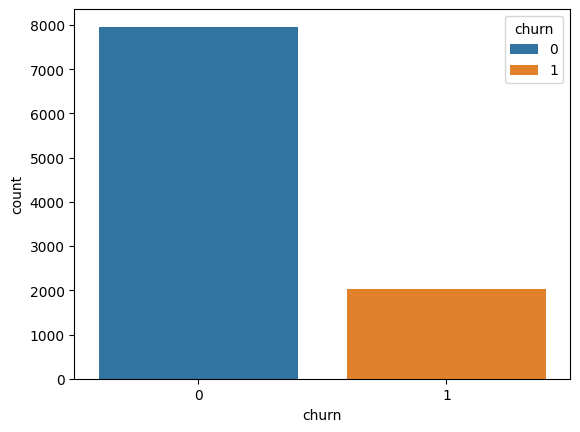

In [27]:
#varialvel target está desbalanceada

import seaborn as sns
ax = sns.countplot(x= 'churn', hue = 'churn', data = dados_final)

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b  - Ler essa matéria

In [28]:
#bibliorteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

#https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [29]:
X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

In [30]:
SEED = 123
smt = SMOTE(random_state= SEED)
X, y = smt.fit_resample(X, y)

In [31]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

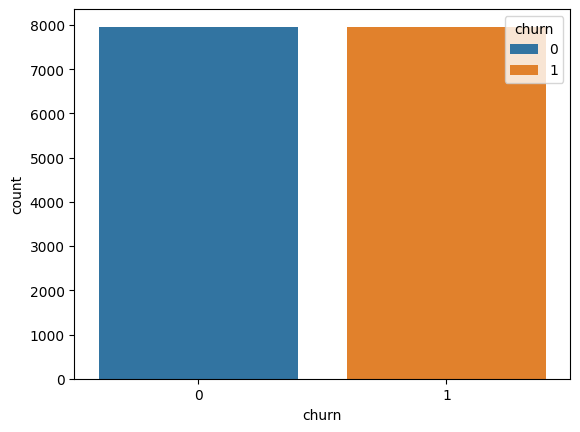

In [32]:
#Gerando mais dados
ax = sns.countplot(x= 'churn', hue = 'churn', data = dados_final)

# 2 Support Vector Machine (SVC)

In [37]:
#importando Bibliotecas
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#separação features (X) e classes (Y)

X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

#Normalizar dados (dados Númericos) - pre-processamento
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

#Separar dados de treino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size = 0.25, random_state = SEED, stratify=y)
#Stratify é responsavel para realizar o balanceamento dos dados de treino e teste direcionado a questão da proporção dos dados

#Criar(istanciar) o modelo
svc = SVC(gamma='auto', random_state=SEED)

#Treinar o modelo
svc.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_svc = svc.predict(X_test)

#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(svc.predict(X_maria_normalizado))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 3 Modelo K-nearest neighbors (KNN) - método baseado na proximidade


In [39]:
#importando Bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# k = igual aonúmero de vizinhos

#separação features (X) e classes (Y)

X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

#Normalizar dados (dados Númericos) - pre-processamento
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

#Separar dados de treino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size = 0.25, random_state = SEED, stratify=y)
#Stratify é responsavel para realizar o balanceamento dos dados de treino e teste direcionado a questão da proporção dos dados

#Criar(istanciar) o modelo
knn = KNeighborsClassifier(metric='euclidean') # k = 5 por padrão

#Treinar o modelo
knn.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_knn = knn.predict(X_test)

#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(knn.predict(X_maria_normalizado))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 3.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

Tem um somatório externo que vai da primeira até a quantidade de colunas n

$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

In [ ]:
# i  =  o número de classes

# 4 Método probabilístico

In [44]:
#importando Bibliotecas
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Não é sensível a escalas

#separação features (X) e classes (Y)

X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

################################################################################
#Não utiliza os dados normalizados, pois utiliza probabilidade

#Normalizar dados (dados Númericos) - pre-processamento
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(X)

################################################################################

#Separar dados de treino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify=y)
#Stratify é responsavel para realizar o balanceamento dos dados de treino e teste direcionado a questão da proporção dos dados

#Criar(istanciar) o modelo
mnb = MultinomialNB()

#Treinar o modelo
mnb.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_mnb = mnb.predict(X_test)

#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(mnb.predict(X_maria_normalizado))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 4.1 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

A diferença dos modelos está relacionados a utilização sendo os dados númericos utilizado o multinomial para outras situações utiliza o outro modelo

## 4.1 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

In [45]:
#importando Bibliotecas
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Não é sensível a escalas

#separação features (X) e classes (Y)

X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

################################################################################
#Não utiliza os dados normalizados, pois utiliza probabilidade

#Normalizar dados (dados Númericos) - pre-processamento
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(X)

################################################################################

#Separar dados de treino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify=y)
#Stratify é responsavel para realizar o balanceamento dos dados de treino e teste direcionado a questão da proporção dos dados

#Criar(istanciar) o modelo
mnb = MultinomialNB()

#Treinar o modelo
mnb.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_mnb = mnb.predict(X_test)

#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(mnb.predict(X_maria_normalizado))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 4.2 - Modelo Bernoulli Naive Bayes



$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

In [ ]:
# i  =  o número de classes

A diferença dos modelos está relacionados a utilização sendo os dados númericos utilizado o multinomial para outras situações utiliza o outro modelo

# 5 Método Simbólico

## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


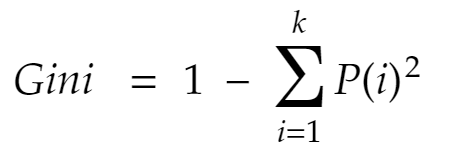

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

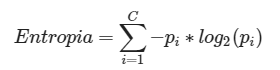


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


In [41]:
from sklearn.svm import LinearSVC # Importando o modelo LinearSVC
from sklearn.tree import DecisionTreeClassifier # Importando o modelo DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE

#SEPARAR TREINO E TESTE
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=SEED, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

#model

dtc = DecisionTreeClassifier(random_state=SEED, max_depth=3)  # Cria uma instância do modelo de árvore de decisão

#Treinar o modelo
dtc.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_dtc = dtc.predict(X_test)

#Utilizar o modelo
X_maria_normalizado = norm.transform(Xmaria)
print(dtc.predict(X_maria_normalizado))

Treinaremos com 11944 elementos e testaremos com 3982 elementos
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


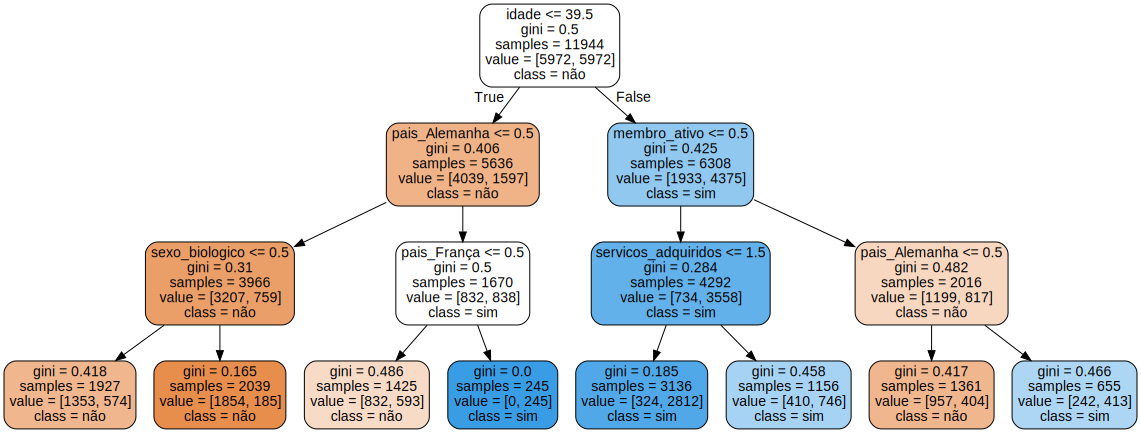

In [46]:
from sklearn.tree import DecisionTreeClassifier # Importando o modelo DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

features = X.columns
dot_data = export_graphviz(dtc, out_file=None, feature_names=features, filled=True, rounded=True, class_names= ['não', 'sim'])
graph = graphviz.Source(dot_data)
graph

# 6 Validação dos modelos

## 6.1 - Matriz de confusão



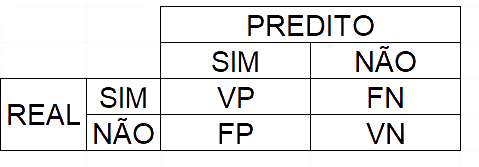

In [47]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
mc_svc = confusion_matrix(y_test, previsoes_svc) # SVC
mc_knn = confusion_matrix(y_test, previsoes_knn) #Knn
mc_mnb = confusion_matrix(y_test, previsoes_mnb) #Naive bayes
mc_dtc = confusion_matrix(y_test, previsoes_dtc) #Árvore de decisão
print(mc_svc, mc_knn, mc_mnb, mc_dtc)

[[1781  210]
 [ 340 1651]] [[1706  285]
 [ 312 1679]] [[ 881 1110]
 [ 625 1366]] [[1679  312]
 [ 629 1362]]


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

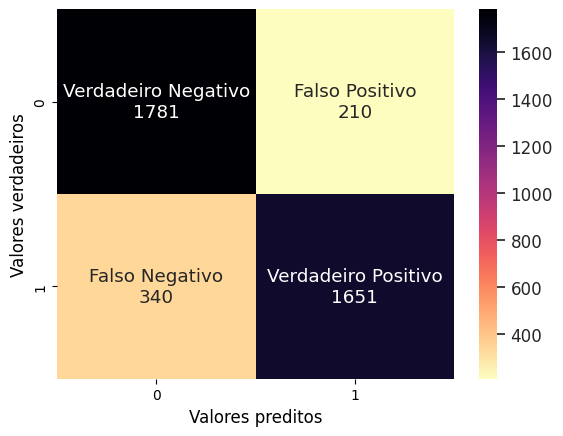

In [49]:
#Chamando a Função
gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

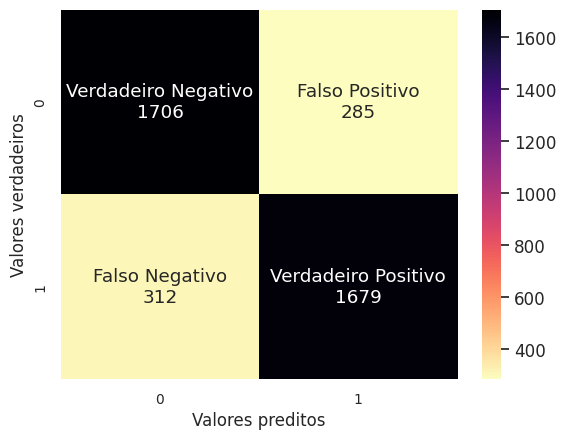

In [50]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

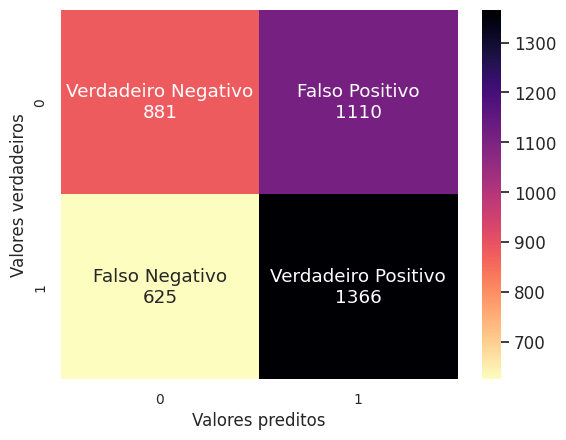

In [51]:
gerando_matriz(mc_mnb, labels, categorias, cmap="magma_r")

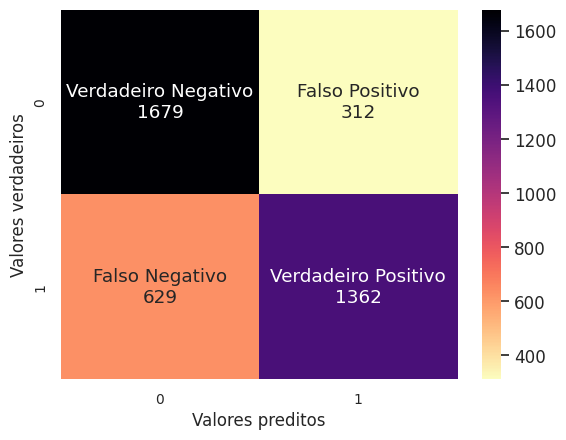

In [53]:
gerando_matriz(mc_dtc, labels, categorias, cmap="magma_r")

## 5.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [54]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, previsoes_svc))
print(accuracy_score(y_test, previsoes_knn))
print(accuracy_score(y_test, previsoes_mnb))
print(accuracy_score(y_test, previsoes_dtc))

0.861878453038674
0.8500753390256153
0.5642893018583627
0.7636865896534405


## 5.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [55]:
from sklearn.metrics import precision_score

print(precision_score(y_test, previsoes_svc))
print(precision_score(y_test, previsoes_knn))
print(precision_score(y_test, previsoes_mnb))
print(precision_score(y_test, previsoes_dtc))

0.8871574422353573
0.854887983706721
0.5516962843295639
0.8136200716845878


## 5.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [56]:
from sklearn.metrics import recall_score

print(recall_score(y_test, previsoes_svc))
print(recall_score(y_test, previsoes_knn))
print(recall_score(y_test, previsoes_mnb))
print(recall_score(y_test, previsoes_dtc))

0.8292315419387243
0.843294826720241
0.6860873932697137
0.6840783525866398


## 5.5 - Escolhendo o melhor modelo


In [58]:
#Escolhendo o melhor modelo

print ('O modelo com o melhor desempenho é o SVC', precision_score(y_test, previsoes_svc) * 100 )

O modelo com o melhor desempenho é o SVC 88.71574422353574
